In [34]:
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter
import spectral_entropy
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [35]:
database_address='../../data/database/bucketbase.db'

In [36]:
def execute_query(database_addres,query_string):
    '''
    
    '''
    engine=sqlalchemy.create_engine(f"sqlite:///{database_address}")
    connection=engine.connect()

    temp_cursor=connection.execute(
        query_string
    )

    temp_result=temp_cursor.fetchall()
    #print(temp_result)
    print(len(temp_result))
    
    connection.close()
    engine.dispose()
    print(len(temp_result))

    if len(temp_result)==0:
        return -1
    elif len(temp_result)>1:
        print('here')
        return temp_result



In [37]:
def parse_one_ms_dial_spectrum(spectrum_text):
    '''
    takes an ms/ms spectrum as a string and returns a tuple of parallel lists?
    '''
    mz_int_pair_list=spectrum_text.split(' ')
    mz_list=[float(temp_pair.split(':')[0]) for temp_pair in mz_int_pair_list]
    intensity_list=[float(temp_pair.split(':')[1]) for temp_pair in mz_int_pair_list]
    
    return np.array([
        mz_list,
        intensity_list
    ])

In [38]:
def normalize_spectrum(spectrum):
    '''
    divides each intensity by the  max of the intensities
    '''
    spectrum[1]=spectrum[1]/(spectrum[1].max())
    return spectrum

In [39]:
def convert_np_spectrum_to_text(spectrum_array):
    '''
    takes an ms/ms spectrum in our numpy array format and converts it to string
    '''
    string_rep=[
        str(spectrum_array[0][i])+':'+str(spectrum_array[1][i]) for i in range(len(spectrum_array[0]))
    ]
    return ' '.join(string_rep)

In [40]:
def plot_some_head_to_tails(spectra):
    '''
    expects a list of spectra
    in the outer list, each spectrum is an element
    within each of those elements, the 0th element is an array of mz and teh 1th is array of intensities
    '''
    
    for spectrum in spectra:
        #print(spectrum)
        plt.stem(spectrum[0],spectrum[1])
    plt.show

In [51]:
def make_distance_matrix(spectra):
    #this is very slow. we should refactor this so that we use an intrinsically vectorized approach using scipy
    
    similarity_matrix=np.zeros(
        shape=(len(spectra),len(spectra))
    )
    
    #clean spectra
    
    
    
    for i in range(len(spectra)):
        if i%50==0:
            print(i)
        #for j in range(i,len(spectra)):
        for j in range(len(spectra)):
            #try:
            similarity_matrix[i][j]=spectral_entropy.similarity(
                spectra[i], spectra[j], 
                method='dot_product',ms2_da=0.015,
                need_clean_spectra=True,
                #need_normalize_result=False
            )
#             except IndexError:
#                 print(spectra[i])
#                 print(spectra[j])
#                 print('$$$$$$$$$$$$$$$$$$$$$$')
                
    #sns.heatmap(similarity_matrix)
    #plt.show()    
    #print(np.diagonal(similarity_matrix))
    #print('------------------------------------------')
    
    
    similarity_matrix=np.triu(similarity_matrix)
    similarity_matrix=similarity_matrix+similarity_matrix.T-np.diag(np.diag(similarity_matrix))
    
    
    
    ############DANGER##############
    #getting some error where 1 was being rep'd as 0.9999999
    #so i just manually set
    np.fill_diagonal(similarity_matrix,1)
    ###############################
    distance_matrix=1-similarity_matrix
    #make symmetric
    
    #sns.heatmap(distance_matrix)
    #plt.show()
    distance_matrix_flattened=distance.squareform(distance_matrix)
    #sns.heatmap(distance.squareform(distance_matrix_flattened))
    #plt.show()
    return similarity_matrix,distance_matrix_flattened
    ######similarity_matrix_flattened=distance.squareform(similarity_matrix)
    ######return similarity_matrix,similarity_matrix_flattened

In [52]:
def make_spectra_like_similarity_metric_expects(spectra):
    '''
    converts an array of parallel mz and intensity into pairs of mz,intensity
    '''
    output_list=list()
    for spectrum in spectra:
        #print(spectrum)
        output_list.append(np.column_stack(spectrum))
        #print(output_list)
        #hold=input('hold')
    return output_list

In [53]:
def get_list_of_bin_id_with_spectra():
    query='''SELECT bin_id,count(*)
    from annotations a
    where (spectrum is not null)
    group by bin_id
    '''
    spectrum_population_data=execute_query(database_address,query)
    #bin_ids=[element[0] for element in spectrum_population_data]
    #populations=[element[1] for element in spectrum_population_data]
    
    bin_id_sorted_by_pop=[
        x for x,_ in sorted(spectrum_population_data, key=lambda pair: pair[1],reverse=True)
    ]
    populations_sorted_by_pop=[
        x for _,x in sorted(spectrum_population_data, key=lambda pair: pair[1],reverse=True)
    ]
    #print(bin_id_sorted_by_pop)
    #print(populations_sorted_by_pop)
    return(bin_id_sorted_by_pop)

In [54]:
bin_ids_pop_desc=get_list_of_bin_id_with_spectra()

2946
2946
here


BIN ID 1
i is 0
BIN ID 108
i is 1
BIN ID 172
i is 2
BIN ID 381
i is 3
BIN ID 423
i is 4
BIN ID 732
i is 5
BIN ID 912
i is 6
BIN ID 936
i is 7
BIN ID 1144
i is 8
BIN ID 1316
i is 9
BIN ID 1928
i is 10
BIN ID 3988
i is 11
BIN ID 631
i is 12
BIN ID 994
i is 13
BIN ID 1449
i is 14
BIN ID 1999
i is 15
BIN ID 2296
i is 16
BIN ID 480
i is 17
BIN ID 1043
i is 18
BIN ID 158
i is 19
BIN ID 1030
i is 20
BIN ID 487
i is 21
BIN ID 18
i is 22
BIN ID 149
i is 23
BIN ID 485
i is 24
BIN ID 497
i is 25
BIN ID 1914
i is 26
BIN ID 3391
i is 27
BIN ID 321
i is 28
BIN ID 371
i is 29
BIN ID 440
i is 30
BIN ID 100
i is 31
BIN ID 616
i is 32
BIN ID 1539
i is 33
BIN ID 307
i is 34
BIN ID 855
i is 35
BIN ID 499
i is 36
BIN ID 385
i is 37
BIN ID 620
i is 38
BIN ID 1835
i is 39
BIN ID 216
i is 40
BIN ID 361
i is 41
BIN ID 862
i is 42
BIN ID 117
i is 43
BIN ID 835
i is 44
BIN ID 1705
i is 45
BIN ID 2772
i is 46
BIN ID 1951
i is 47
BIN ID 2652
i is 48
BIN ID 4325
i is 49
BIN ID 4910
i is 50
BIN ID 888
i is 51
BIN ID

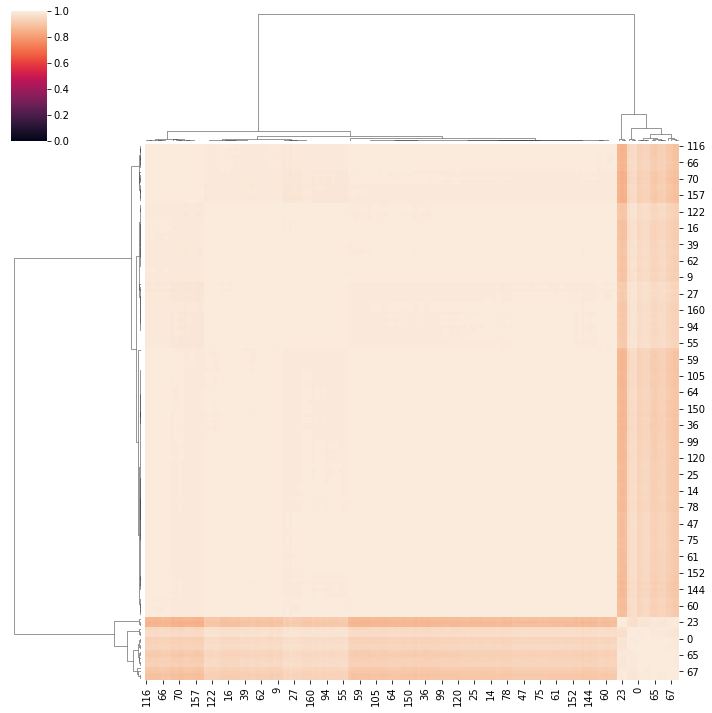

BIN ID 1001
i is 81
169
169
here
0
50
100
150


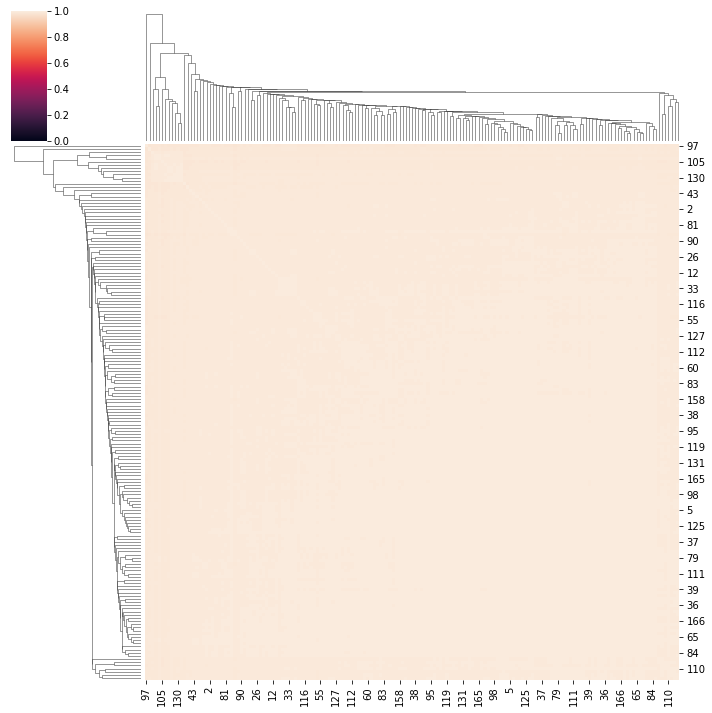

BIN ID 1352
i is 82
163
163
here
0
50
100
150


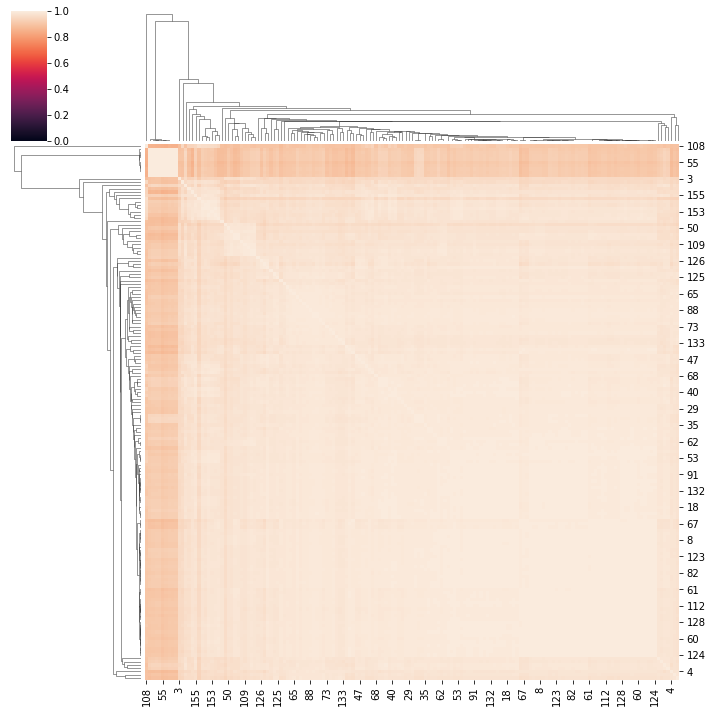

BIN ID 41
i is 83
162
162
here
0
50
100
150


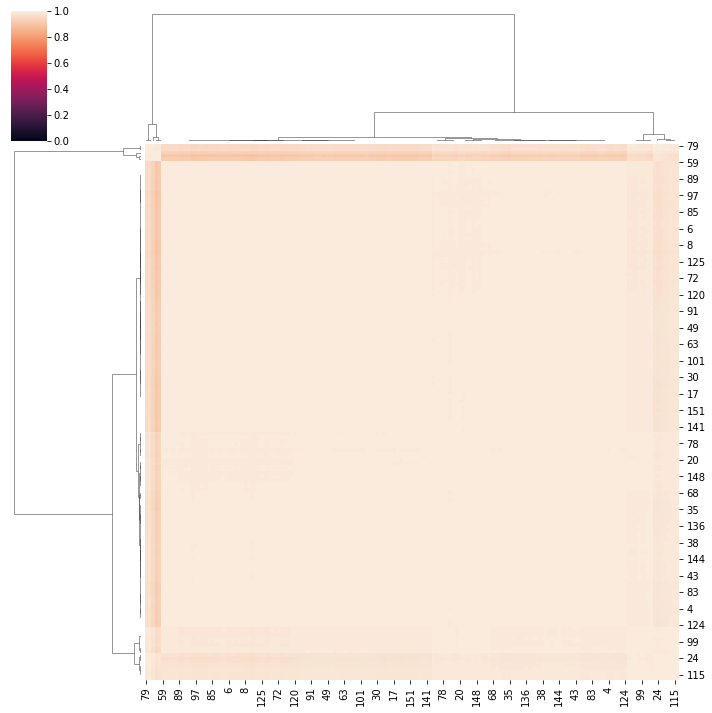

BIN ID 481
i is 84
162
162
here
0
50
100
150


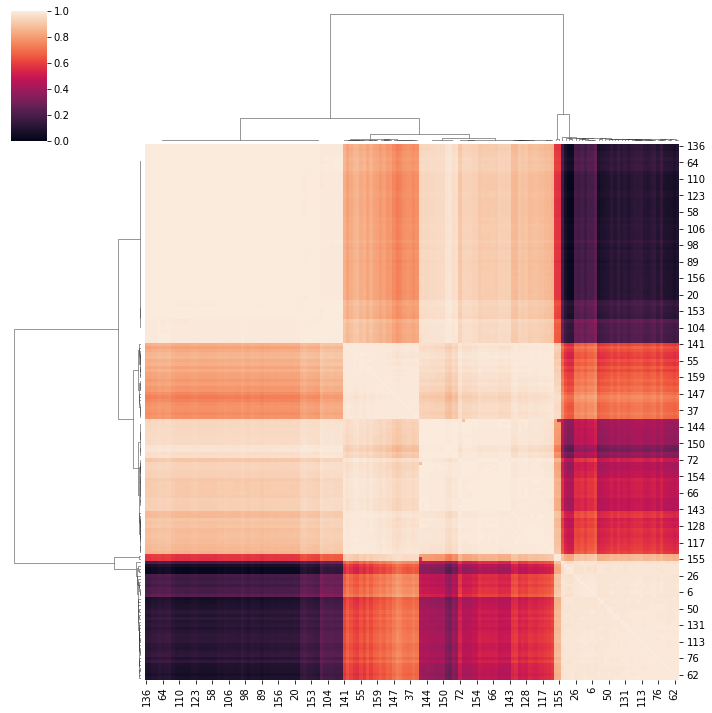

BIN ID 5345
i is 85
168
168
here
0
50
100
150


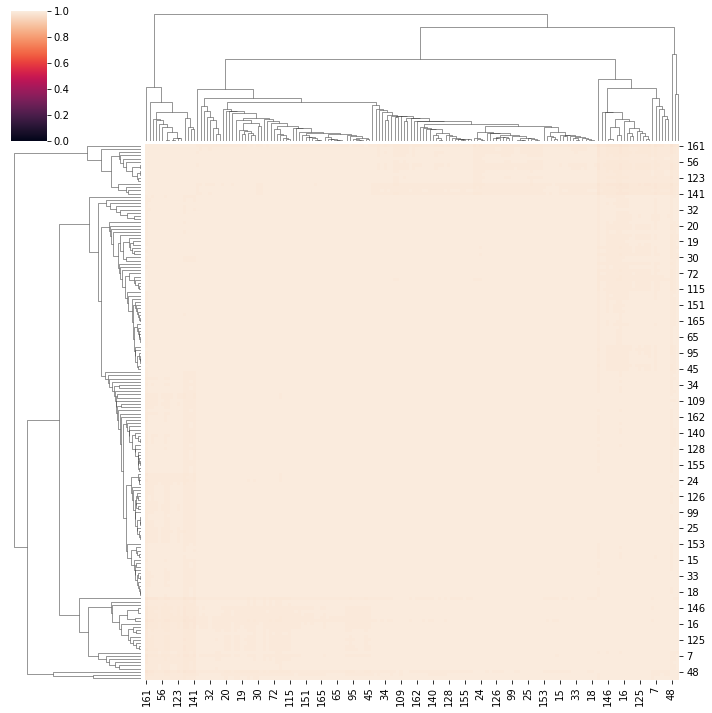

BIN ID 409
i is 86
160
160
here
0
50
100
150


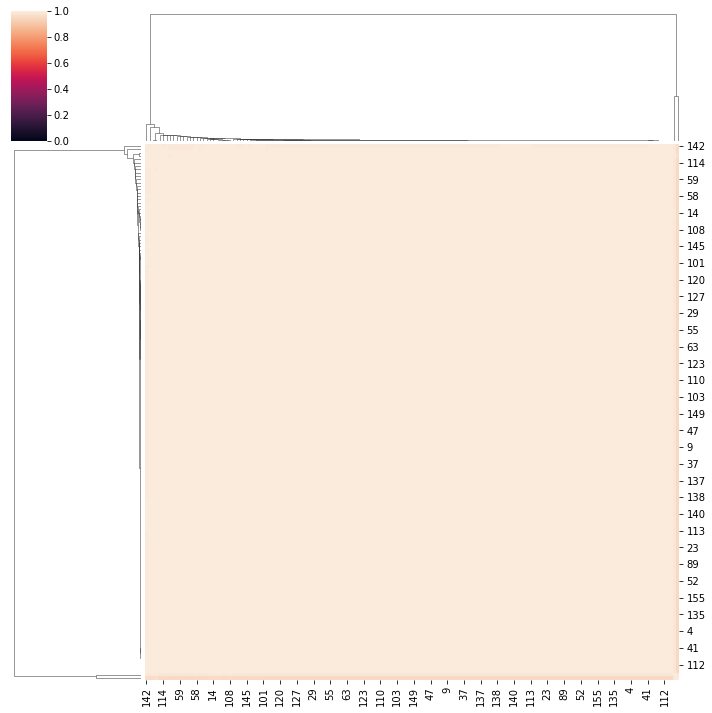

BIN ID 714
i is 87
163
163
here
0
50
100
150


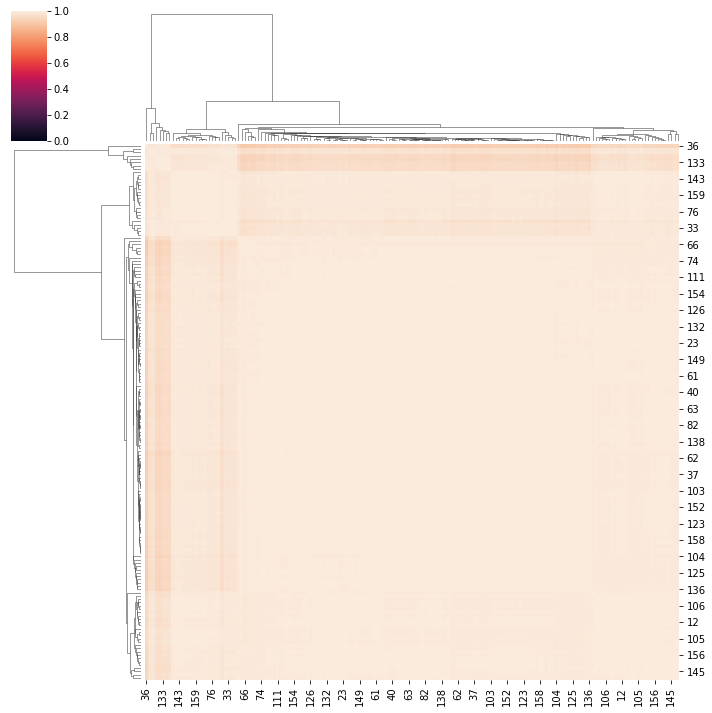

BIN ID 1095
i is 88
161
161
here
0
50
100
150


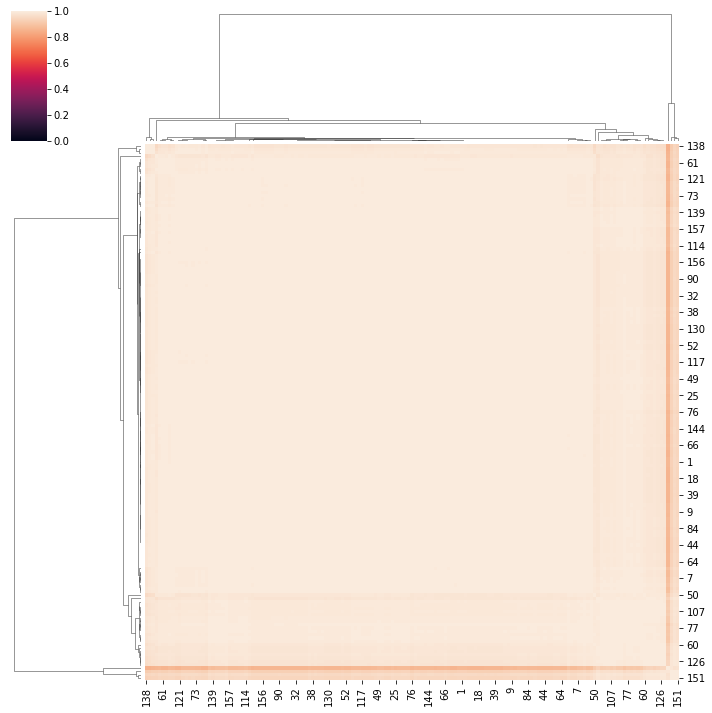

BIN ID 126
i is 89
158
158
here
0
50
100
150


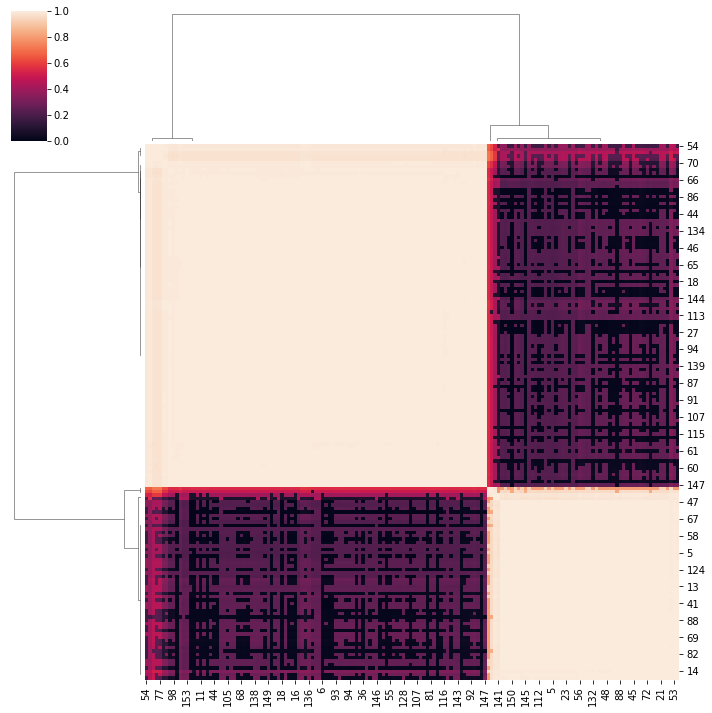

BIN ID 177
i is 90
155
155
here
0
50
100
150


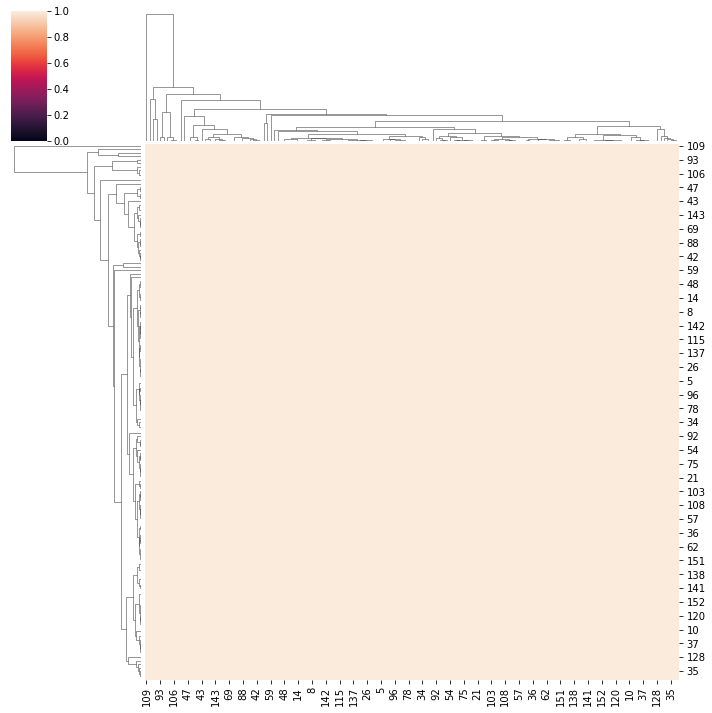

BIN ID 982
i is 91
155
155
here
0
50
100
150


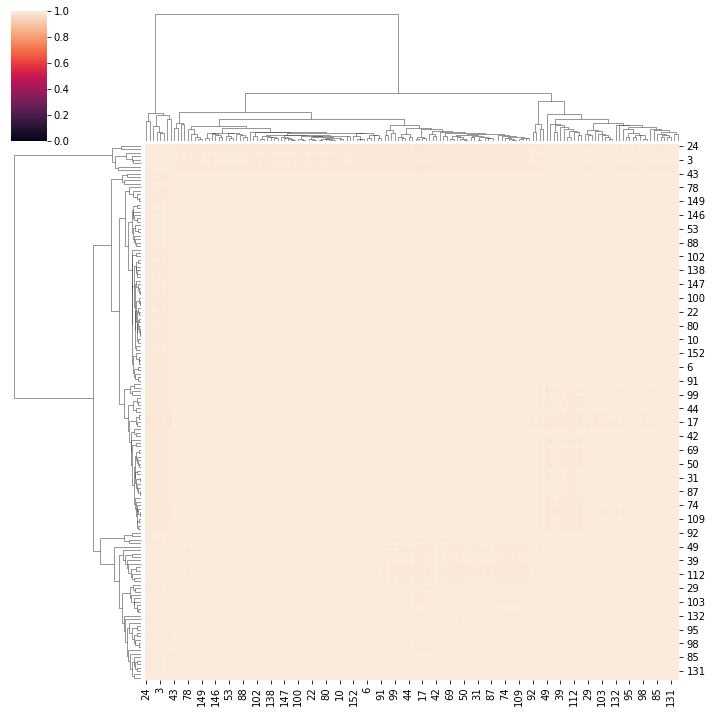

BIN ID 306
i is 92
154
154
here
0
50
100
150


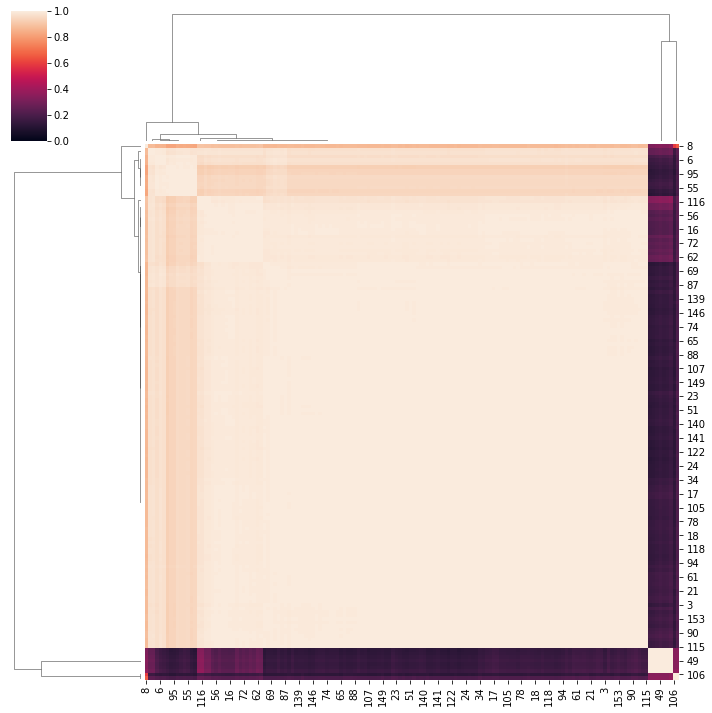

BIN ID 530
i is 93
154
154
here
0
50
100
150


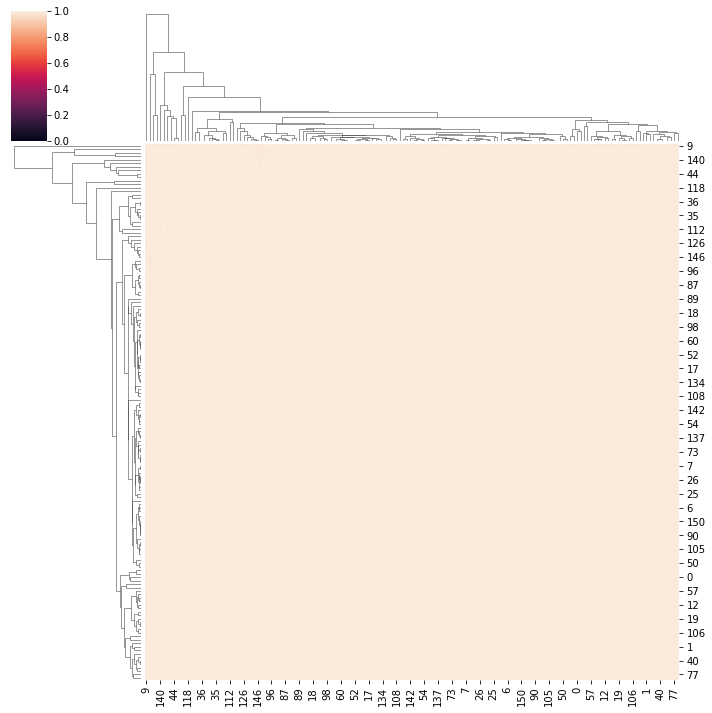

BIN ID 139
i is 94
153
153
here
0
50
100
150


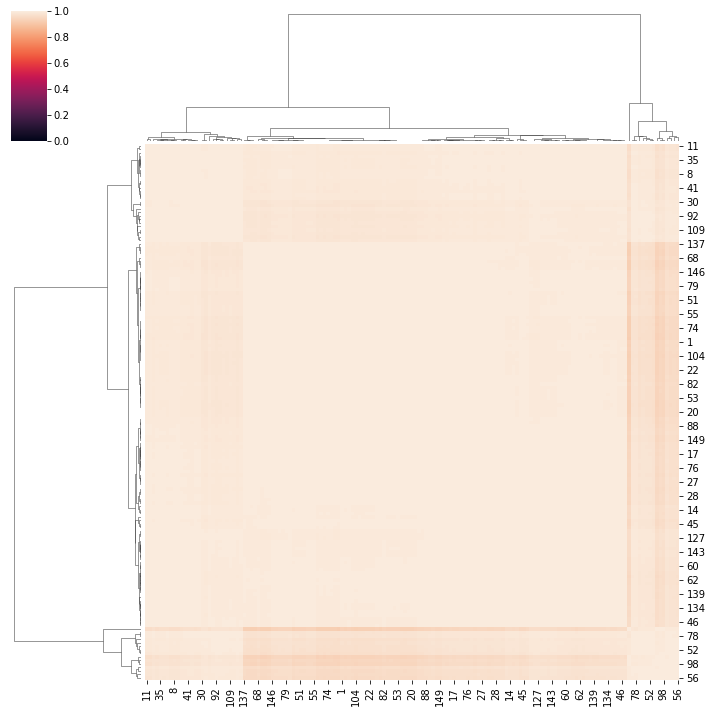

BIN ID 1441
i is 95
153
153
here
0
50
100
150


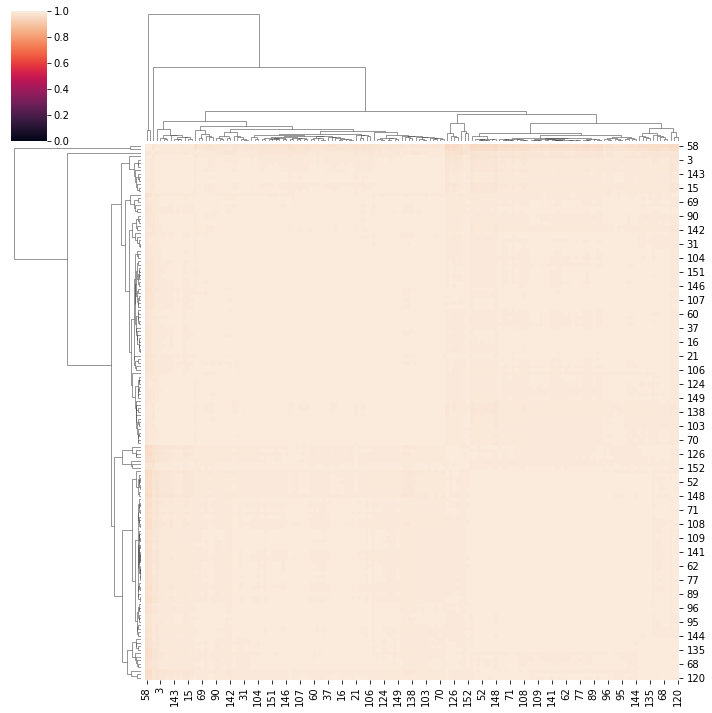

BIN ID 2117
i is 96
153
153
here
0
50
100
150


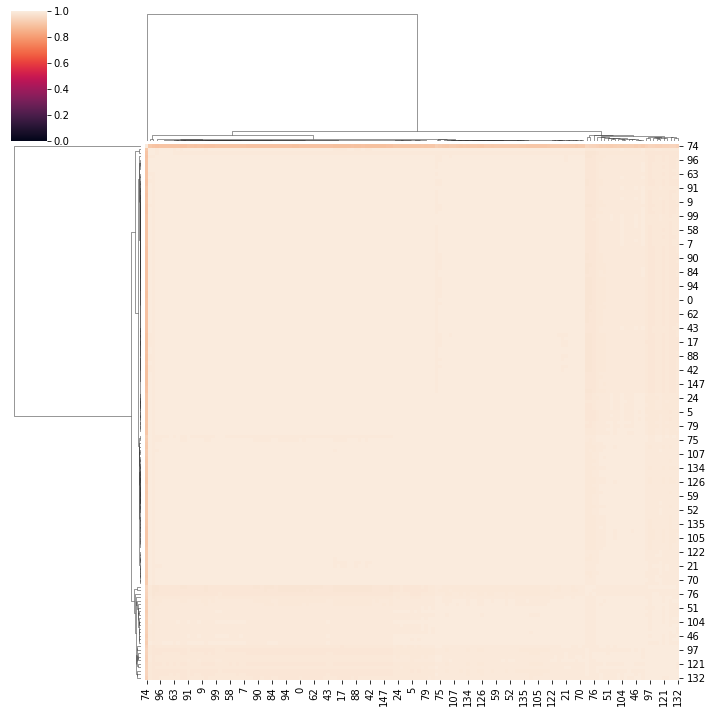

BIN ID 333
i is 97
152
152
here
0
50
100
150


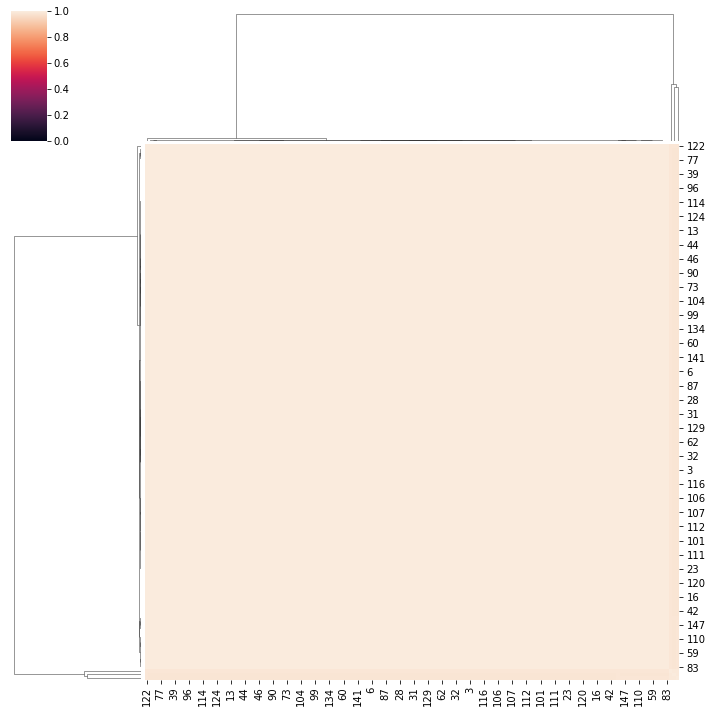

BIN ID 561
i is 98
153
153
here
0
50
100
150


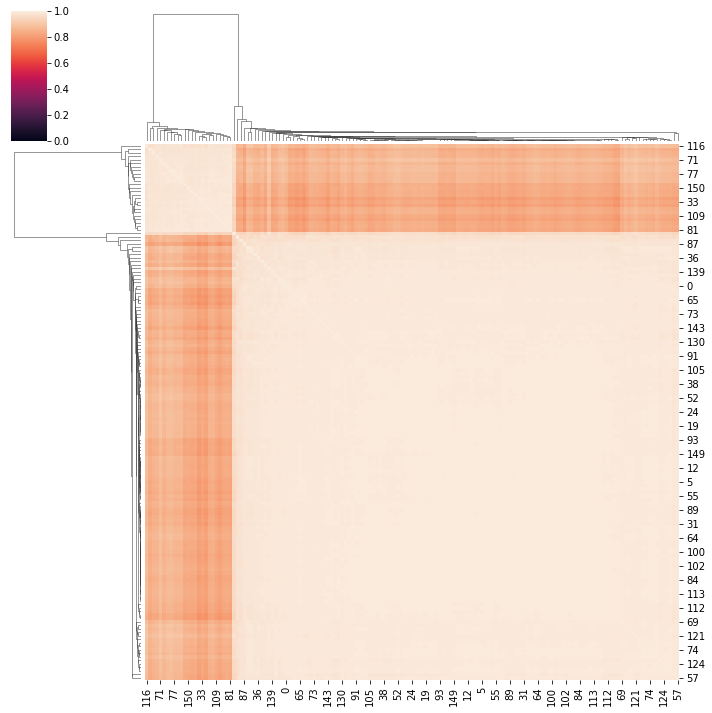

BIN ID 669
i is 99
152
152
here
0
50
100
150


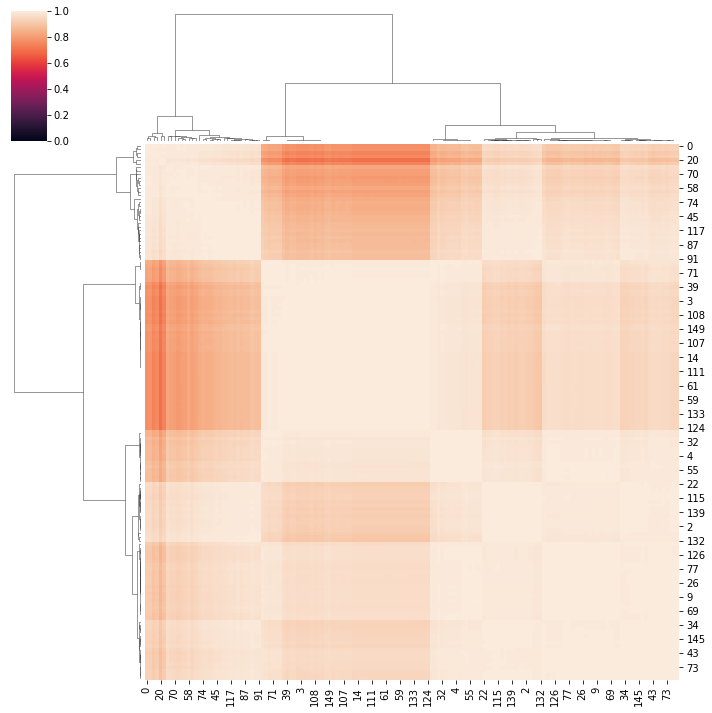

BIN ID 3155
i is 100
152
152
here
0
50
100
150


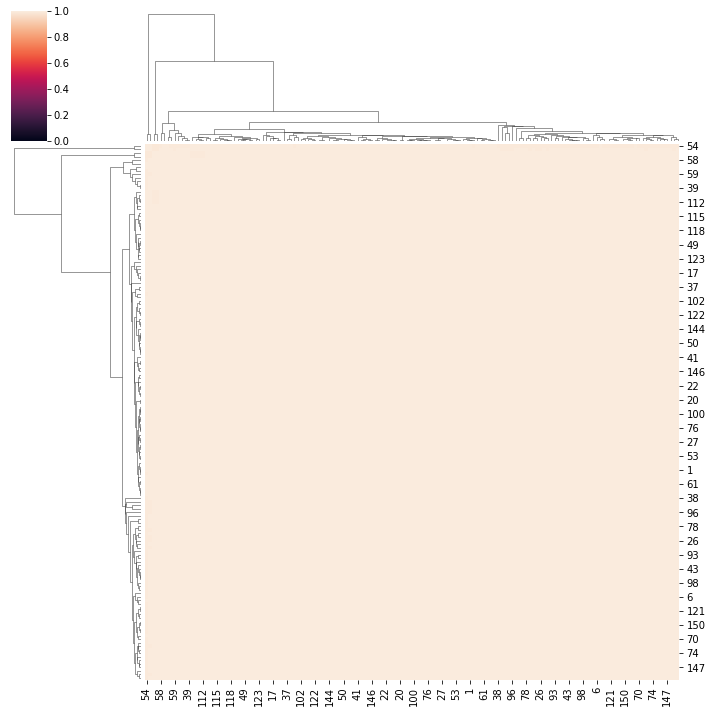

BIN ID 580
i is 101
BIN ID 1151
i is 102
BIN ID 735
i is 103
BIN ID 219
i is 104
BIN ID 629
i is 105
BIN ID 1176
i is 106
BIN ID 275
i is 107
BIN ID 606
i is 108
BIN ID 979
i is 109
BIN ID 193
i is 110
BIN ID 2070
i is 111
BIN ID 437
i is 112
BIN ID 1551
i is 113
BIN ID 1467
i is 114
BIN ID 1050
i is 115
BIN ID 2255
i is 116
BIN ID 2192
i is 117
BIN ID 72
i is 118
BIN ID 636
i is 119
BIN ID 627
i is 120
BIN ID 3424
i is 121
BIN ID 21
i is 122
BIN ID 763
i is 123
BIN ID 12
i is 124
BIN ID 1692
i is 125
BIN ID 1437
i is 126
BIN ID 1815
i is 127
BIN ID 2060
i is 128
BIN ID 2607
i is 129
BIN ID 2825
i is 130
BIN ID 736
i is 131
BIN ID 360
i is 132
BIN ID 602
i is 133
BIN ID 1148
i is 134
BIN ID 2848
i is 135
BIN ID 1461
i is 136
BIN ID 281
i is 137
BIN ID 2913
i is 138
BIN ID 95
i is 139
BIN ID 312
i is 140
BIN ID 284
i is 141
BIN ID 1006
i is 142
BIN ID 1088
i is 143
BIN ID 1432
i is 144
BIN ID 2406
i is 145
BIN ID 569
i is 146
BIN ID 1713
i is 147
BIN ID 3378
i is 148
BIN ID 24
i is 149


i is 778
BIN ID 1855
i is 779
BIN ID 2042
i is 780
BIN ID 2119
i is 781
BIN ID 2243
i is 782
BIN ID 2315
i is 783
BIN ID 2316
i is 784
BIN ID 2403
i is 785
BIN ID 2529
i is 786
BIN ID 2810
i is 787
BIN ID 3078
i is 788
BIN ID 3080
i is 789
BIN ID 3176
i is 790
BIN ID 3356
i is 791
BIN ID 3359
i is 792
BIN ID 3565
i is 793
BIN ID 3619
i is 794
BIN ID 4500
i is 795
BIN ID 4504
i is 796
BIN ID 678
i is 797
BIN ID 730
i is 798
BIN ID 1297
i is 799
BIN ID 1578
i is 800
BIN ID 1849
i is 801
BIN ID 1937
i is 802
BIN ID 2665
i is 803
BIN ID 3377
i is 804
BIN ID 4236
i is 805
BIN ID 4724
i is 806
BIN ID 92
i is 807
BIN ID 207
i is 808
BIN ID 860
i is 809
BIN ID 957
i is 810
BIN ID 1491
i is 811
BIN ID 1500
i is 812
BIN ID 1795
i is 813
BIN ID 2267
i is 814
BIN ID 2396
i is 815
BIN ID 2596
i is 816
BIN ID 2776
i is 817
BIN ID 2780
i is 818
BIN ID 2837
i is 819
BIN ID 2877
i is 820
BIN ID 2966
i is 821
BIN ID 3302
i is 822
BIN ID 4986
i is 823
BIN ID 5288
i is 824
BIN ID 5665
i is 825
BIN ID 342


i is 1278
BIN ID 68
i is 1279
BIN ID 364
i is 1280
BIN ID 553
i is 1281
BIN ID 556
i is 1282
BIN ID 574
i is 1283
BIN ID 664
i is 1284
BIN ID 694
i is 1285
BIN ID 727
i is 1286
BIN ID 914
i is 1287
BIN ID 945
i is 1288
BIN ID 968
i is 1289
BIN ID 1009
i is 1290
BIN ID 1028
i is 1291
BIN ID 1057
i is 1292
BIN ID 1080
i is 1293
BIN ID 1129
i is 1294
BIN ID 1164
i is 1295
BIN ID 1222
i is 1296
BIN ID 1264
i is 1297
BIN ID 1318
i is 1298
BIN ID 1363
i is 1299
BIN ID 1393
i is 1300
BIN ID 1516
i is 1301
BIN ID 1562
i is 1302
BIN ID 1586
i is 1303
BIN ID 1666
i is 1304
BIN ID 1668
i is 1305
BIN ID 1687
i is 1306
BIN ID 1726
i is 1307
BIN ID 1779
i is 1308
BIN ID 1865
i is 1309
BIN ID 1894
i is 1310
BIN ID 1949
i is 1311
BIN ID 1985
i is 1312
BIN ID 2441
i is 1313
BIN ID 2450
i is 1314
BIN ID 2463
i is 1315
BIN ID 2484
i is 1316
BIN ID 2551
i is 1317
BIN ID 2602
i is 1318
BIN ID 2615
i is 1319
BIN ID 2651
i is 1320
BIN ID 2858
i is 1321
BIN ID 2882
i is 1322
BIN ID 2958
i is 1323
BIN ID 3192


BIN ID 143
i is 1778
BIN ID 311
i is 1779
BIN ID 541
i is 1780
BIN ID 554
i is 1781
BIN ID 673
i is 1782
BIN ID 816
i is 1783
BIN ID 866
i is 1784
BIN ID 991
i is 1785
BIN ID 1005
i is 1786
BIN ID 1021
i is 1787
BIN ID 1214
i is 1788
BIN ID 1225
i is 1789
BIN ID 1392
i is 1790
BIN ID 1435
i is 1791
BIN ID 1462
i is 1792
BIN ID 1512
i is 1793
BIN ID 1533
i is 1794
BIN ID 1538
i is 1795
BIN ID 1540
i is 1796
BIN ID 1564
i is 1797
BIN ID 1616
i is 1798
BIN ID 1647
i is 1799
BIN ID 1649
i is 1800
BIN ID 1759
i is 1801
BIN ID 1826
i is 1802
BIN ID 1836
i is 1803
BIN ID 1853
i is 1804
BIN ID 1867
i is 1805
BIN ID 1950
i is 1806
BIN ID 2005
i is 1807
BIN ID 2026
i is 1808
BIN ID 2065
i is 1809
BIN ID 2074
i is 1810
BIN ID 2123
i is 1811
BIN ID 2217
i is 1812
BIN ID 2238
i is 1813
BIN ID 2262
i is 1814
BIN ID 2320
i is 1815
BIN ID 2376
i is 1816
BIN ID 2414
i is 1817
BIN ID 2417
i is 1818
BIN ID 2434
i is 1819
BIN ID 2468
i is 1820
BIN ID 2531
i is 1821
BIN ID 2600
i is 1822
BIN ID 2612
i is 1

BIN ID 3369
i is 2278
BIN ID 3430
i is 2279
BIN ID 3467
i is 2280
BIN ID 3509
i is 2281
BIN ID 3596
i is 2282
BIN ID 3649
i is 2283
BIN ID 3686
i is 2284
BIN ID 3734
i is 2285
BIN ID 3855
i is 2286
BIN ID 3909
i is 2287
BIN ID 4144
i is 2288
BIN ID 4226
i is 2289
BIN ID 4248
i is 2290
BIN ID 4373
i is 2291
BIN ID 4552
i is 2292
BIN ID 4577
i is 2293
BIN ID 4638
i is 2294
BIN ID 4779
i is 2295
BIN ID 4811
i is 2296
BIN ID 4848
i is 2297
BIN ID 4955
i is 2298
BIN ID 5084
i is 2299
BIN ID 5086
i is 2300
BIN ID 5120
i is 2301
BIN ID 5213
i is 2302
BIN ID 5307
i is 2303
BIN ID 5374
i is 2304
BIN ID 5486
i is 2305
BIN ID 5601
i is 2306
BIN ID 5602
i is 2307
BIN ID 5733
i is 2308
BIN ID 5736
i is 2309
BIN ID 5737
i is 2310
BIN ID 5895
i is 2311
BIN ID 5935
i is 2312
BIN ID 23
i is 2313
BIN ID 74
i is 2314
BIN ID 91
i is 2315
BIN ID 93
i is 2316
BIN ID 308
i is 2317
BIN ID 378
i is 2318
BIN ID 407
i is 2319
BIN ID 566
i is 2320
BIN ID 663
i is 2321
BIN ID 665
i is 2322
BIN ID 770
i is 2323
BIN

BIN ID 4570
i is 2886
BIN ID 4575
i is 2887
BIN ID 4591
i is 2888
BIN ID 4608
i is 2889
BIN ID 4611
i is 2890
BIN ID 4633
i is 2891
BIN ID 4637
i is 2892
BIN ID 4664
i is 2893
BIN ID 4683
i is 2894
BIN ID 4707
i is 2895
BIN ID 4719
i is 2896
BIN ID 4752
i is 2897
BIN ID 4775
i is 2898
BIN ID 4919
i is 2899
BIN ID 4922
i is 2900
BIN ID 4931
i is 2901
BIN ID 4934
i is 2902
BIN ID 4937
i is 2903
BIN ID 4943
i is 2904
BIN ID 4949
i is 2905
BIN ID 5023
i is 2906
BIN ID 5027
i is 2907
BIN ID 5038
i is 2908
BIN ID 5075
i is 2909
BIN ID 5117
i is 2910
BIN ID 5123
i is 2911
BIN ID 5155
i is 2912
BIN ID 5202
i is 2913
BIN ID 5234
i is 2914
BIN ID 5256
i is 2915
BIN ID 5279
i is 2916
BIN ID 5287
i is 2917
BIN ID 5289
i is 2918
BIN ID 5308
i is 2919
BIN ID 5339
i is 2920
BIN ID 5344
i is 2921
BIN ID 5349
i is 2922
BIN ID 5485
i is 2923
BIN ID 5490
i is 2924
BIN ID 5503
i is 2925
BIN ID 5513
i is 2926
BIN ID 5526
i is 2927
BIN ID 5595
i is 2928
BIN ID 5670
i is 2929
BIN ID 5680
i is 2930
BIN ID 568

In [56]:
for i,temp_bin in enumerate(bin_ids_pop_desc):
    print(f'BIN ID {temp_bin}')
    print(f'i is {i}')
    #print(temp_bin)
    if i<80 or i>100: #or i<2:
        continue
    get_spectrum_sample_query=f'''
    select spectrum from runs r
    inner join annotations a
    on r.run_id=a.run_id
    where (run_type="Sample") and (bin_id={temp_bin}) and (spectrum is not null)
    '''
    
    input_spectra_list=execute_query(database_address,get_spectrum_sample_query)

    input_spectra_list=[temp_tup[0] for temp_tup in input_spectra_list]

    all_spectrum_list=[
        parse_one_ms_dial_spectrum(temp_spectrum) for temp_spectrum in input_spectra_list
    ]
    all_spectrum_list=make_spectra_like_similarity_metric_expects(all_spectrum_list)
        
    #####Put routine like "denoising" here if we desire#####
    #yuanyues code denoises alreayd....
    
    #generate the similarity matrix
    similarity_matrix,distance_matrix_flattened=make_distance_matrix(all_spectrum_list)
    
    #generate the linkage matrix
    row_linkage=hierarchy.linkage(
        distance_matrix_flattened,method='average'
    )
    
    #generate the linkage matrix
    column_linkage=row_linkage
    
    #make the heatmap
    sns.clustermap(
        similarity_matrix,
        row_linkage=row_linkage,
        col_linkage=column_linkage,
        vmin=0,
        vmax=1
    )
    plt.show()
    
    